## Methods to initialize patches data structure  

In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
# from features3D import PatchExtractor3D
from tomo_encoders.patches import Patches
import pandas as pd
import numpy as np
import time

In [2]:
# vol_shape = (351, 2500,65)
vol_shape = (351, 350, 340)
vol = np.random.randint(0, 2**8-1, vol_shape)
model_size = (64,64,64)

In [3]:
from porespy.generators import blobs

In [4]:
vol = blobs(vol_shape)

**test on multiple grids**

0.07760595178242237


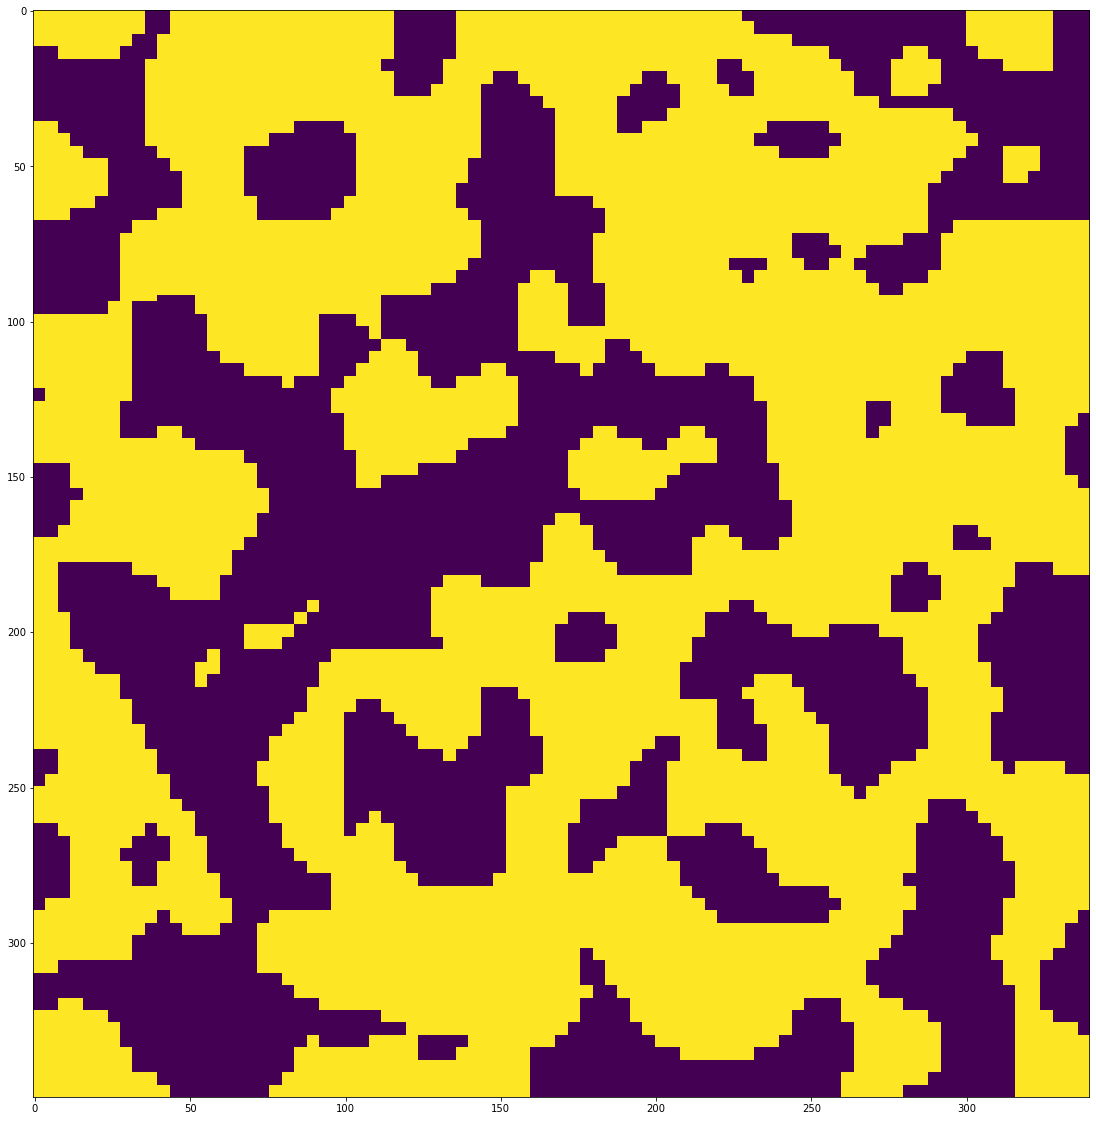

In [5]:
kwargs = {"initialize_by" : 'multiple-grids',
          "min_patch_size" : model_size, \
          "max_stride" : 4, "n_points" : None}
p = Patches(vol_shape, **kwargs)
sub_vols = p.extract(vol, model_size)
vol_out = p.stitch(sub_vols, model_size)
print(np.sum(vol != vol_out)/np.size(vol))
vol_eq = (vol == vol_out).astype(np.uint8)

fig, ax = plt.subplots(1,1, figsize = (20,20))
# ax.imshow(vol_eq[vol_eq.shape[0]//2])
ax.imshow(vol_out[vol_eq.shape[0]//2])

**test case with single grid**  

Virtual devices cannot be modified after being initialized
0.029906365965189495


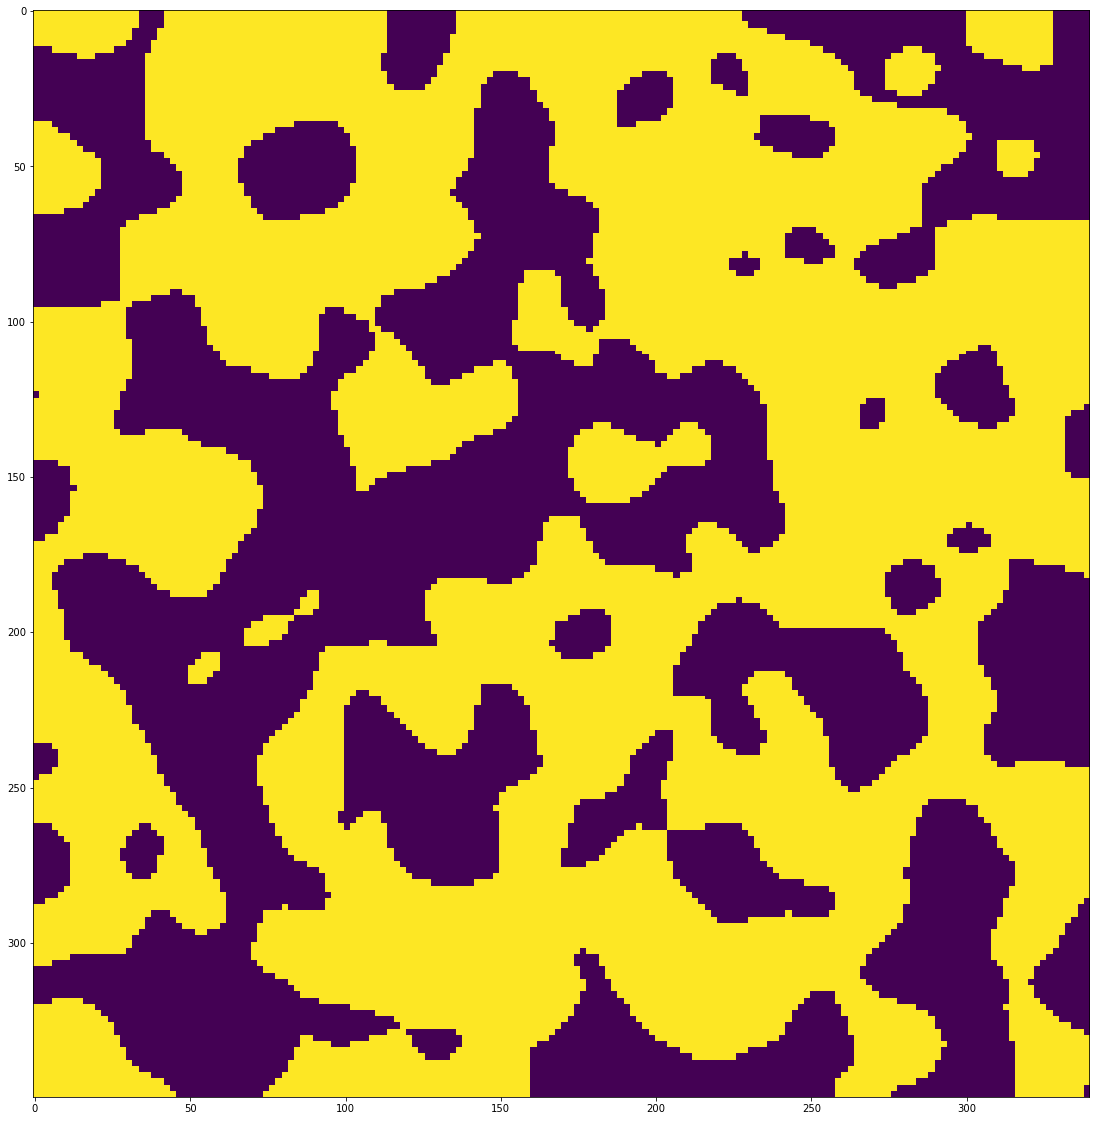

In [6]:
p = Patches(vol_shape, initialize_by = 'grid', patch_size = model_size, stride = 2)
sub_vols = p.extract(vol, model_size)
vol_out = p.stitch(sub_vols, model_size)
print(np.sum(vol != vol_out)/np.size(vol))
vol_eq = (vol == vol_out).astype(np.uint8)
fig, ax = plt.subplots(1,1, figsize = (20,20))
# ax.imshow(vol_eq[vol_eq.shape[0]//2])
ax.imshow(vol_out[vol_eq.shape[0]//2])

In [7]:
# sizes = 500, 1000, 1500, 2000
# times = []
# for ii, size in enumerate(sizes):
    
#     vol_shape = tuple([size]*3)
#     vol = np.zeros(vol_shape)

#     t0 = time.time()
#     p = Patches(vol_shape, initialize_by = 'grid', patch_size = model_size, stride = 1)
#     sub_vols = p.extract(vol, model_size)
#     vol_out = p.stitch(sub_vols, model_size)
#     t1 = time.time()
#     time_elapsed = (t1 - t0)*1000.0
#     print("size %i, time %.2f ms"%(size, time_elapsed))
#     times.append(time_elapsed)

In [8]:
# plt.plot(sizes, times)